In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)
%matplotlib inline

In [2]:
data = pd.read_csv('matches.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 94.4+ KB


In [3]:
data['city'].fillna('Dubai',inplace=True)

In [4]:
data['winner'].dropna()
data['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [5]:
data['team2'] = data['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['team1'] = data['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['winner'] = data['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [6]:
total_matches = data['team2'].value_counts() + data['team1'].value_counts()

In [7]:
data['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

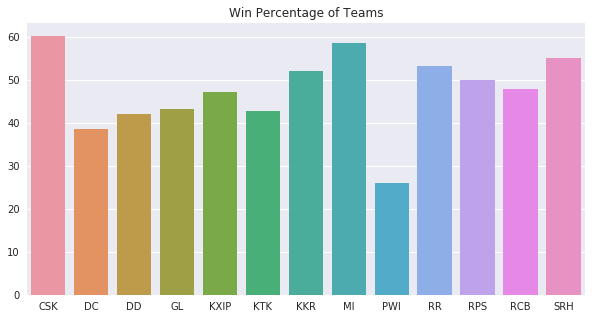

In [93]:
win_percent = (data['winner'].value_counts() * 100)/total_matches
new_index = ['CSK','DC','DD','GL','KXIP','KTK','KKR','MI','PWI','RR','RPS','RCB','SRH']
win_percent.index = new_index
fig, ax = plt.subplots()
plt.title('Win Percentage of Teams')
fig.set_size_inches(10, 5)
sns.barplot(x=win_percent.index,y=win_percent.values)

<Figure size 432x288 with 0 Axes>

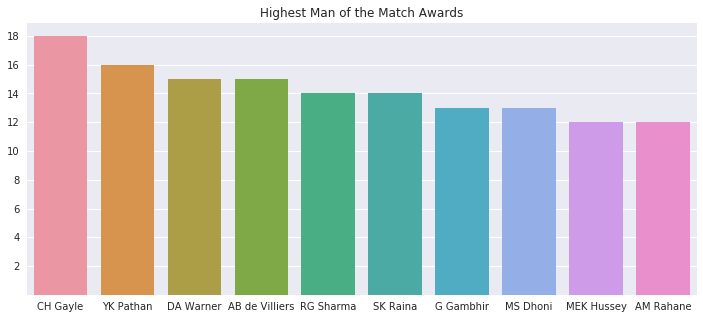

In [95]:
width = 0.5
plt.figure(2)
fig, ax = plt.subplots()
plt.title('Highest Man of the Match Awards')
plt.yticks(np.arange(2,20,2))
fig.set_size_inches(12, 5)
MOM = data['player_of_match'].value_counts().nlargest(10)
sns.barplot(MOM.index,MOM.values)

In [10]:
data['win_method'] = ['Bat_First' if el != 0 else 'Bat_Second' for el in data['win_by_runs']]

In [11]:
grouped = data.groupby('winner')['win_method']
grouped.groups.keys()

['Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Kochi Tuskers Kerala',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Deccan Chargers',
 'Sunrisers Hyderabad',
 'Rising Pune Supergiants',
 'Chennai Super Kings',
 'Pune Warriors',
 'Mumbai Indians']

In [12]:
ind = grouped.groups.keys()
new_ind = ['RCB','KKR','RR','KTK','KXIP','DD','GL','DC','SRH','RPS','CSK','PWI','MI']
x_arg = np.arange(len(ind))
Bat_First = []
Bat_Second = []
for el in ind:
    values = grouped.get_group(el).value_counts()
    Bat_Second.append(values.loc['Bat_Second'])
    if 'Bat_First' in values.index:
        Bat_First.append(values.loc['Bat_First'])
    else:
         Bat_First.append(0)

<Figure size 432x288 with 0 Axes>

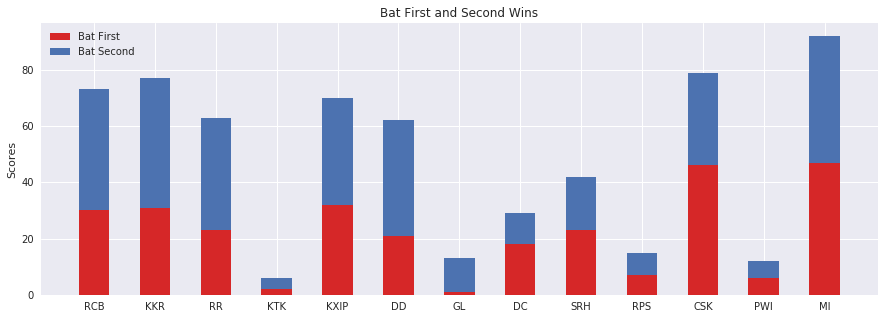

In [96]:
plt.figure(3)
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

width = 0.5
p1 = plt.bar(x_arg, Bat_First,width,color='#d62728')
p2 = plt.bar(x_arg, Bat_Second,width,
             bottom=Bat_First)
plt.ylabel('Scores')
plt.title('Bat First and Second Wins')
plt.xticks(x_arg,new_ind)
plt.legend((p1[0], p2[0]), ('Bat First', 'Bat Second'))

plt.show()

In [64]:
#win_group = data.groupby('winner')['win_by_runs']
#key = win_group.groups.keys()
#fig = plt.figure()
#fig.subplots_adjust(hspace=0.5, wspace=0.5)
#for i,j in zip(range(1,len(key)+1),key):
#    plt.subplot(7,2,i)
#    win_group.get_group(j).plot.line(figsize=(20,35),title=j)
        


In [213]:
df = pd.read_csv('deliveries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

<Figure size 432x288 with 0 Axes>

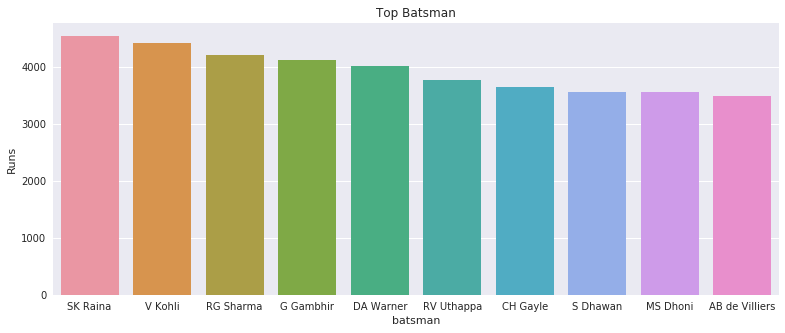

In [220]:
#Top Run Getters in all season
top_batsman = df.groupby('batsman')['batsman_runs'].sum().nlargest(10)
plt.figure(4)
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
plt.title('Top Batsman')
plt.xlabel('Batsman')
plt.ylabel('Runs')
sns.barplot(x=top_batsman.index,y=top_batsman.values)

In [99]:
final_data = pd.merge(data,deliveries,left_on='id',right_on='match_id')

<Figure size 432x288 with 0 Axes>

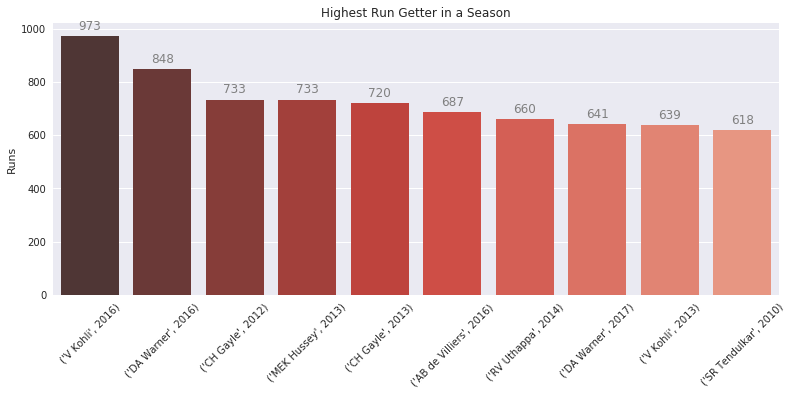

In [158]:
#Top Batsman(Run Getters) in a Season
top_batsman_by_season = final_data.groupby(['batsman','season'])['batsman_runs'].sum().nlargest(10)
plt.figure(4)
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
plt.title('Highest Run Getter in a Season')
plt.ylabel('Runs')
plt.xticks(rotation=45)
g = sns.barplot(x=top_batsman_by_season.index,y=top_batsman_by_season.values,palette='Reds_d')
#annotate axis = seaborn axis
for p in g.patches:
             ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')

bowler
SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
B Kumar            111
A Nehra            106
R Vinay Kumar      103
Z Khan             103
R Ashwin           100
Name: player_dismissed, dtype: int64


<Figure size 432x288 with 0 Axes>

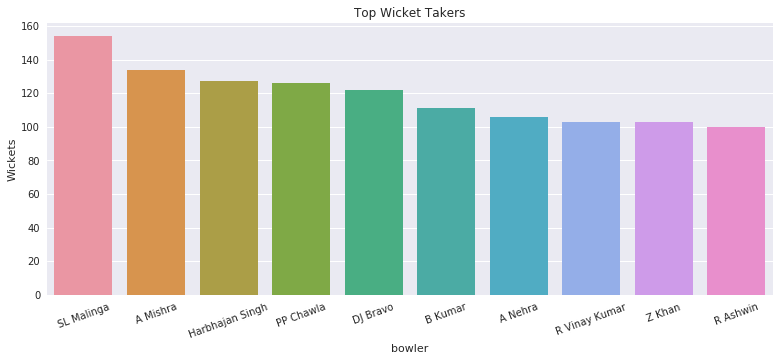

In [211]:
#Top Wicket-Takers in all season
d = final_data[final_data['dismissal_kind'] != 'run out'] 
top_bowler = d.groupby('bowler')['player_dismissed'].count().nlargest(10)
print top_bowler
plt.figure(5)
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
plt.title('Top Wicket Takers')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=20)
sns.barplot(x=top_bowler.index,y=top_bowler.values)

<Figure size 432x288 with 0 Axes>

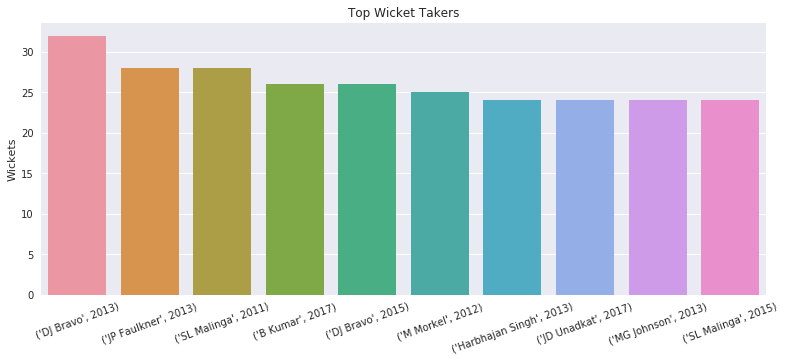

In [212]:
top_bowler_by_season = d.groupby(['bowler','season'])['player_dismissed'].count().nlargest(10)
#Top Wicket-Takers in all season
plt.figure(5)
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
plt.title('Top Wicket Takers')
plt.ylabel('Wickets')
plt.xticks(rotation=20)
sns.barplot(x=top_bowler_by_season.index,y=top_bowler_by_season.values)

In [230]:
top = final_data.groupby(['batsman','season'])['batsman_runs'].sum()
highest_run_getters = top.groupby(level='season').nlargest(10)

In [217]:
only_sixes = final_data[final_data['batsman_runs'] == 6]
most_sixes =  only_sixes.groupby(['batsman'])['batsman_runs'].count().nlargest(15)
most_sixes

batsman
CH Gayle          266
SK Raina          174
RG Sharma         173
DA Warner         160
V Kohli           160
AB de Villiers    158
MS Dhoni          156
YK Pathan         149
KA Pollard        148
Yuvraj Singh      141
RV Uthappa        125
BB McCullum       124
SR Watson         122
DR Smith          117
V Sehwag          106
Name: batsman_runs, dtype: int64

In [229]:
#Highest Strike Rate
runs = df.groupby('batsman')['batsman_runs'].sum()
num_of_del = df.groupby('batsman')['batsman_runs'].count()
min_500 = num_of_del[num_of_del >= 500]
max_SR = (runs / min_500)*100
max_SR.nlargest(15)

batsman
GJ Maxwell         157.564103
V Sehwag           148.827059
AB de Villiers     145.129059
CH Gayle           144.194313
YK Pathan          140.751445
KA Pollard         140.621266
DA Warner          138.318401
DA Miller          137.709251
JA Morkel          136.938202
Harbhajan Singh    135.194585
SK Raina           134.995548
SR Watson          134.838379
ST Jayasuriya      134.031414
AC Gilchrist       133.054662
MS Dhoni           132.835821
Name: batsman_runs, dtype: float64

In [236]:
#Most Economical Bowlers
total_runs = final_data.groupby('bowler')['total_runs'].sum()
number_of_del = final_data.groupby('bowler')['total_runs'].count()
min_100 = number_of_del[number_of_del >= 500]
min_Eco = (total_runs / min_100)*6
min_Eco.nsmallest(15)

bowler
SP Narine          6.395706
R Ashwin           6.490886
DW Steyn           6.600278
A Kumble           6.646999
M Muralitharan     6.698292
SL Malinga         6.757238
DL Vettori         6.833121
J Botha            6.922426
Harbhajan Singh    6.931415
S Nadeem           7.029024
B Kumar            7.039922
R Sharma           7.058824
DP Nannes          7.097242
MA Starc           7.107843
Shakib Al Hasan    7.115100
Name: total_runs, dtype: float64